# Ajuste de hiperparámetros (GridSearch)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy (test con stratify y GridSearch): 0.99
Matriz de Confusión:
[[1526    2    7    4   10   51]
 [  11 2785    0    2    0    2]
 [   6    0  390    0    1    3]
 [   5    3    0 4785    6    1]
 [   5    1    1    9 4782    2]
 [  13    4    3    0   17 2363]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.97      0.95      0.96      1600
              imbalance       1.00      0.99      1.00      2800
                 normal       0.97      0.97      0.97       400
               overhang       1.00      1.00      1.00      4800
              underhang       0.99      1.00      0.99      4800
  vertical-misalignment       0.98      0.98      0.98      2400

               accuracy                           0.99     16800
              macro avg       0.98      0.98      0.98     16800
           weighted avg       0.99      0.99      0.99     

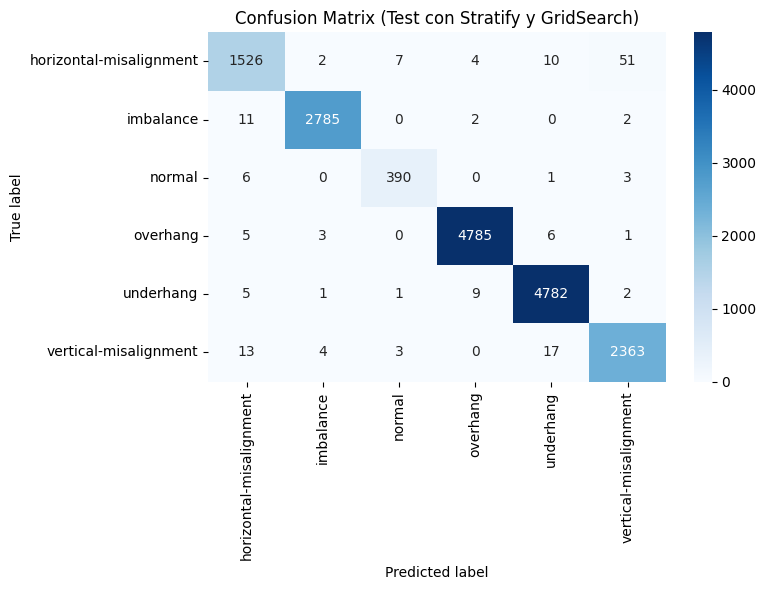

Mejores hiperparámetros encontrados por GridSearchCV:
{'max_features': 'sqrt', 'n_estimators': 100}


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_reduced.csv")

X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'n_estimators': [50, 75, 100],  
    'max_features': ['sqrt', 'log2']  
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con stratify y GridSearch): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(best_model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con Stratify y GridSearch)")
plt.tight_layout()
plt.show()

print("Mejores hiperparámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)


# Guardado de modelo

In [8]:
import pickle  
with open('modelo_random_forest_best.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Modelo guardado exitosamente con pickle.")


Modelo guardado exitosamente con pickle.
